In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
insu_data=pd.read_csv(r"insurance_data.csv")
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
TXN_DATE_TIME               10000 non-null object
TRANSACTION_ID              10000 non-null object
CUSTOMER_ID                 10000 non-null object
POLICY_NUMBER               10000 non-null object
POLICY_EFF_DT               10000 non-null object
LOSS_DT                     10000 non-null object
REPORT_DT                   10000 non-null object
INSURANCE_TYPE              10000 non-null object
PREMIUM_AMOUNT              10000 non-null float64
CLAIM_AMOUNT                10000 non-null int64
CUSTOMER_NAME               10000 non-null object
ADDRESS_LINE1               10000 non-null object
ADDRESS_LINE2               1495 non-null object
CITY                        9946 non-null object
STATE                       10000 non-null object
POSTAL_CODE                 10000 non-null int64
SSN                         10000 non-null object
MARITAL_STATUS              10000 non-null ob

In [3]:
insu_data.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [4]:
insu_data.duplicated().sum()

0

In [5]:
object_columns = [i for i in insu_data.columns if insu_data[i].dtype == 'object']
object_columns
num_col=[i for i in insu_data.columns if insu_data[i].dtype != 'object']
num_col

['PREMIUM_AMOUNT',
 'CLAIM_AMOUNT',
 'POSTAL_CODE',
 'AGE',
 'TENURE',
 'NO_OF_FAMILY_MEMBERS',
 'ROUTING_NUMBER',
 'ANY_INJURY',
 'POLICE_REPORT_AVAILABLE',
 'INCIDENT_HOUR_OF_THE_DAY']

In [6]:
object_columns

['TXN_DATE_TIME',
 'TRANSACTION_ID',
 'CUSTOMER_ID',
 'POLICY_NUMBER',
 'POLICY_EFF_DT',
 'LOSS_DT',
 'REPORT_DT',
 'INSURANCE_TYPE',
 'CUSTOMER_NAME',
 'ADDRESS_LINE1',
 'ADDRESS_LINE2',
 'CITY',
 'STATE',
 'SSN',
 'MARITAL_STATUS',
 'EMPLOYMENT_STATUS',
 'RISK_SEGMENTATION',
 'HOUSE_TYPE',
 'SOCIAL_CLASS',
 'ACCT_NUMBER',
 'CUSTOMER_EDUCATION_LEVEL',
 'CLAIM_STATUS',
 'INCIDENT_SEVERITY',
 'AUTHORITY_CONTACTED',
 'INCIDENT_STATE',
 'INCIDENT_CITY',
 'AGENT_ID',
 'VENDOR_ID']

In [7]:
#deleting the unwanted variables
del insu_data['TXN_DATE_TIME']
del insu_data['TRANSACTION_ID']
del insu_data['CUSTOMER_ID']
del insu_data['POLICY_NUMBER']
del insu_data['CUSTOMER_NAME']
del insu_data['ADDRESS_LINE1']
del insu_data['ADDRESS_LINE2']
del insu_data['CITY']
del insu_data['SSN']
del insu_data['ACCT_NUMBER']
del insu_data['AGENT_ID']
del insu_data['VENDOR_ID']
del insu_data['POLICY_EFF_DT']
del insu_data['LOSS_DT']
del insu_data['MARITAL_STATUS']
del insu_data['POSTAL_CODE']
del insu_data['ROUTING_NUMBER']
del insu_data['INCIDENT_HOUR_OF_THE_DAY']
del insu_data['INCIDENT_CITY']
del insu_data['SOCIAL_CLASS']
 

In [8]:
del insu_data['REPORT_DT']

In [9]:
insu_data['INCIDENT_STATE'].value_counts()

CA    1048
CO     707
FL     689
AZ     637
CT     619
AL     612
MD     597
GA     592
DC     587
OK     582
AR     581
TN     581
MA     576
KY     536
AK     529
VT     527
Name: INCIDENT_STATE, dtype: int64

In [10]:
#Droping null values
insu_data=insu_data.dropna()

In [11]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9471 entries, 0 to 9999
Data columns (total 17 columns):
INSURANCE_TYPE              9471 non-null object
PREMIUM_AMOUNT              9471 non-null float64
CLAIM_AMOUNT                9471 non-null int64
STATE                       9471 non-null object
AGE                         9471 non-null int64
TENURE                      9471 non-null int64
EMPLOYMENT_STATUS           9471 non-null object
NO_OF_FAMILY_MEMBERS        9471 non-null int64
RISK_SEGMENTATION           9471 non-null object
HOUSE_TYPE                  9471 non-null object
CUSTOMER_EDUCATION_LEVEL    9471 non-null object
CLAIM_STATUS                9471 non-null object
INCIDENT_SEVERITY           9471 non-null object
AUTHORITY_CONTACTED         9471 non-null object
ANY_INJURY                  9471 non-null int64
POLICE_REPORT_AVAILABLE     9471 non-null int64
INCIDENT_STATE              9471 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 1.3+ MB


In [12]:
#Backup data
bk=insu_data.copy()

In [13]:
bk.head()

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,STATE,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE
0,Health,157.13,9000,AZ,54,89,Y,3,L,Own,Bachelor,A,Major Loss,Police,0,1,GA
1,Property,141.71,26000,CO,61,80,Y,4,L,Rent,Bachelor,A,Total Loss,Ambulance,1,0,AL
2,Property,157.24,13000,CA,47,68,Y,6,L,Rent,PhD,A,Total Loss,Police,0,1,CO
3,Health,172.87,16000,GA,36,16,Y,7,L,Mortgage,Masters,A,Minor Loss,Ambulance,0,0,GA
4,Travel,88.53,3000,CA,51,16,Y,2,M,Rent,Masters,A,Major Loss,Police,0,1,TN


In [14]:
#Unique values of claim status attribute
value_counts = bk['CLAIM_STATUS'].value_counts()

print("Value counts for each unique value:")
print(value_counts)


Value counts for each unique value:
A    8994
D     477
Name: CLAIM_STATUS, dtype: int64


In [15]:
#ENCOFING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
insu_data['INSURANCE_TYPE']=le.fit_transform(insu_data['INSURANCE_TYPE'])
insu_data['RISK_SEGMENTATION']=le.fit_transform(insu_data['RISK_SEGMENTATION'])
insu_data['HOUSE_TYPE']=le.fit_transform(insu_data['HOUSE_TYPE'])
insu_data['INCIDENT_SEVERITY']=le.fit_transform(insu_data['INCIDENT_SEVERITY'])
insu_data['AUTHORITY_CONTACTED']=le.fit_transform(insu_data['AUTHORITY_CONTACTED'])
insu_data['CLAIM_STATUS']=le.fit_transform(insu_data['CLAIM_STATUS'])
insu_data['INCIDENT_STATE']=le.fit_transform(insu_data['INCIDENT_STATE'])
insu_data['EMPLOYMENT_STATUS']=le.fit_transform(insu_data['EMPLOYMENT_STATUS'])

In [16]:
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('Bachelor',4)
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('MD',1)
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('PhD',2)
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('Masters',3)
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('College',5)
insu_data['CUSTOMER_EDUCATION_LEVEL']=insu_data.CUSTOMER_EDUCATION_LEVEL.replace('High School',6)

In [17]:
insu_data['STATE']=le.fit_transform(insu_data['STATE'])

In [18]:
insu_data['STATE']

0        3
1        5
2        4
3        9
4        4
5        3
7        9
8       10
9        1
10       6
11      14
12       0
13       9
14       2
16       6
17       5
18       6
19       7
20      15
21       4
22       8
24       9
25      12
26       4
27       2
28       1
29      14
30       3
31      12
32       7
        ..
9967     8
9968    10
9970    14
9971    14
9972     8
9973    15
9974     8
9975     5
9976    14
9977     1
9978     9
9979     9
9980     8
9981     5
9983     5
9984     4
9986     4
9987    11
9988     1
9989     7
9990     4
9991     3
9992    10
9993    10
9994    14
9995     6
9996     2
9997     0
9998     4
9999    13
Name: STATE, Length: 9471, dtype: int32

In [19]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9471 entries, 0 to 9999
Data columns (total 17 columns):
INSURANCE_TYPE              9471 non-null int32
PREMIUM_AMOUNT              9471 non-null float64
CLAIM_AMOUNT                9471 non-null int64
STATE                       9471 non-null int32
AGE                         9471 non-null int64
TENURE                      9471 non-null int64
EMPLOYMENT_STATUS           9471 non-null int32
NO_OF_FAMILY_MEMBERS        9471 non-null int64
RISK_SEGMENTATION           9471 non-null int32
HOUSE_TYPE                  9471 non-null int32
CUSTOMER_EDUCATION_LEVEL    9471 non-null int64
CLAIM_STATUS                9471 non-null int32
INCIDENT_SEVERITY           9471 non-null int32
AUTHORITY_CONTACTED         9471 non-null int32
ANY_INJURY                  9471 non-null int64
POLICE_REPORT_AVAILABLE     9471 non-null int64
INCIDENT_STATE              9471 non-null int32
dtypes: float64(1), int32(9), int64(7)
memory usage: 998.9 KB


In [20]:
inst=insu_data['INSURANCE_TYPE']
inst1=bk['INSURANCE_TYPE']
state=insu_data['STATE']
state1=bk['STATE']
empst=insu_data['EMPLOYMENT_STATUS']
empst1=bk['EMPLOYMENT_STATUS']
riskseg=insu_data['RISK_SEGMENTATION']
riskseg1=bk['RISK_SEGMENTATION']
houset=insu_data['HOUSE_TYPE']
houset1=bk['HOUSE_TYPE']
custedu=insu_data['CUSTOMER_EDUCATION_LEVEL']
custedu1=bk['CUSTOMER_EDUCATION_LEVEL']
claimst=insu_data['CLAIM_STATUS']
claimst1=bk['CLAIM_STATUS']
incidentseve=insu_data['INCIDENT_SEVERITY']
incidentseve1=bk['INCIDENT_SEVERITY']
authcont=insu_data['AUTHORITY_CONTACTED']
authcont1=bk['AUTHORITY_CONTACTED']
insidentst=insu_data['INCIDENT_STATE']
insidentst1=bk['INCIDENT_STATE']

In [21]:
print(insidentst1)

0       GA
1       AL
2       CO
3       GA
4       TN
5       AZ
7       FL
8       AZ
9       CA
10      MD
11      CT
12      KY
13      AK
14      CO
16      DC
17      AL
18      MA
19      CO
20      CO
21      DC
22      CA
24      FL
25      TN
26      GA
27      MA
28      MD
29      CO
30      CO
31      AL
32      KY
        ..
9967    AR
9968    AR
9970    CO
9971    GA
9972    FL
9973    OK
9974    CA
9975    AZ
9976    MA
9977    AL
9978    MD
9979    MA
9980    GA
9981    VT
9983    AZ
9984    AL
9986    VT
9987    CA
9988    AL
9989    GA
9990    KY
9991    AZ
9992    GA
9993    TN
9994    OK
9995    CT
9996    MA
9997    OK
9998    AR
9999    CT
Name: INCIDENT_STATE, Length: 9471, dtype: object


In [22]:
#using zip, we mapped the data and backup data
inst_mapping= dict(zip(inst, inst1))
state_mapping=dict(zip(state, state1))
empst_mapping= dict(zip(empst, empst1))
riskseg_mapping=dict(zip(riskseg, riskseg1))
houset_mapping=dict(zip(houset,houset1))
custedu_mapping=dict(zip(custedu, custedu1))
claimst_mapping=dict(zip(claimst,claimst1))
incidentseve_mapping= dict(zip(incidentseve, incidentseve1))
authcont_mapping=dict(zip(authcont, authcont1))
insidentst_mapping=dict(zip(insidentst, insidentst1))


 
print(custedu_mapping) 

{4: 'Bachelor', 2: 'PhD', 3: 'Masters', 5: 'College', 6: 'High School', 1: 'MD'}


In [23]:
print(custedu_mapping) 

{4: 'Bachelor', 2: 'PhD', 3: 'Masters', 5: 'College', 6: 'High School', 1: 'MD'}


In [24]:
#Converted the mapped data into dataframe
inst_mapping = pd.DataFrame(list(inst_mapping.items()), columns=['Encoded Value', 'INSURANCE_TYPE'])
state_mapping= pd.DataFrame(list(state_mapping.items()), columns=['Encoded Value', 'STATE'])
empst_mapping= pd.DataFrame(list(empst_mapping.items()), columns=['Encoded Value', 'EMPLOYMENT_STATUS'])
riskseg_mapping= pd.DataFrame(list(riskseg_mapping.items()), columns=['Encoded Value', 'RISK_SEGMENTATION'])
houset_mapping= pd.DataFrame(list(houset_mapping.items()), columns=['Encoded Value', 'HOUSE_TYPE'])
custedu_mapping= pd.DataFrame(list(custedu_mapping.items()), columns=['Encoded Value', 'CUSTOMER_EDUCATION_LEVEL'])
claimst_mapping= pd.DataFrame(list(claimst_mapping.items()), columns=['Encoded Value', 'CLAIM_STATUS'])
incidentseve_mapping= pd.DataFrame(list(incidentseve_mapping.items()), columns=['Encoded Value', 'INCIDENT_SEVERITY'])
authcont_mapping= pd.DataFrame(list(authcont_mapping.items()), columns=['Encoded Value', 'AUTHORITY_CONTACTED'])
insidentst_mapping= pd.DataFrame(list(insidentst_mapping.items()), columns=['Encoded Value', 'INCIDENT_STATE'])

#Sorting
inst_mapping =inst_mapping.sort_values(by='Encoded Value')
state_mapping=state_mapping.sort_values(by='Encoded Value')
empst_mapping= empst_mapping.sort_values(by='Encoded Value')
riskseg_mapping=riskseg_mapping.sort_values(by='Encoded Value')
houset_mapping=houset_mapping.sort_values(by='Encoded Value')
custedu_mapping=custedu_mapping.sort_values(by='Encoded Value')
claimst_mapping=claimst_mapping.sort_values(by='Encoded Value')
incidentseve_mapping=incidentseve_mapping.sort_values(by='Encoded Value')
authcont_mapping= authcont_mapping.sort_values(by='Encoded Value')
insidentst_mapping=insidentst_mapping.sort_values(by='Encoded Value')

In [25]:
print(custedu_mapping)

   Encoded Value CUSTOMER_EDUCATION_LEVEL
5              1                       MD
1              2                      PhD
2              3                  Masters
0              4                 Bachelor
3              5                  College
4              6              High School


In [26]:
import pickle
with open('inst_mapping.pkl', 'wb') as file:
    pickle.dump(inst_mapping, file)
with open('empst_mapping.pkl', 'wb') as file:
    pickle.dump(empst_mapping, file)
with open('riskseg_mapping.pkl', 'wb') as file:
    pickle.dump(riskseg_mapping, file)
with open('state_mapping.pkl', 'wb') as file:
    pickle.dump(state_mapping, file)
with open('houset_mapping.pkl', 'wb') as file:
    pickle.dump(houset_mapping, file)
with open('custedu_mapping.pkl', 'wb') as file:
    pickle.dump(custedu_mapping, file)
with open('claimst_mapping.pkl', 'wb') as file:
    pickle.dump(claimst_mapping, file)
with open('incidentseve_mapping.pkl', 'wb') as file:
    pickle.dump(incidentseve_mapping, file)
with open('authcont_mapping.pkl', 'wb') as file:
    pickle.dump(authcont_mapping, file)
with open('insidentst_mapping.pkl', 'wb') as file:
    pickle.dump(insidentst_mapping, file)

In [27]:
insu_data.isnull().sum()

INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
STATE                       0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_STATE              0
dtype: int64

In [28]:
CLAIM_STATUS= insu_data.CLAIM_STATUS.value_counts()
print('Class 0:', CLAIM_STATUS[0])
print('Class 1:',CLAIM_STATUS[1])
print('Proportion:', round(CLAIM_STATUS[0] / CLAIM_STATUS[1], 2), ': 1')
print('Total HS Records:', len(insu_data))

Class 0: 8994
Class 1: 477
Proportion: 18.86 : 1
Total HS Records: 9471


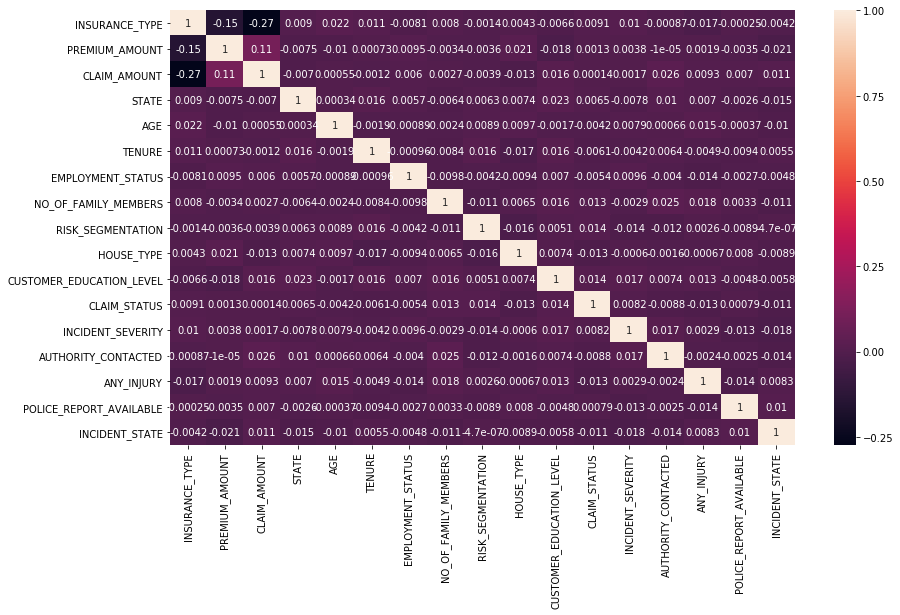

In [29]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(insu_data.corr(),annot=True)

In [30]:
insu_data=insu_data.dropna(axis=0)

In [31]:
insu_data.isnull().sum()

INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
STATE                       0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_STATE              0
dtype: int64

In [32]:
value_counts = insu_data['CLAIM_STATUS'].value_counts()

print("Value counts for each unique value:")
print(value_counts)


Value counts for each unique value:
0    8994
1     477
Name: CLAIM_STATUS, dtype: int64


In [35]:
#getting target and independent variables
IndepVar = []
for col in insu_data.columns:
    if col != 'CLAIM_STATUS':
        IndepVar.append(col)

TargetVar = 'CLAIM_STATUS'

x = insu_data[IndepVar].values
y = insu_data[TargetVar].values

In [36]:
#balancing the dataset
from imblearn.over_sampling import RandomOverSampler
class_weights = {0: 1, 1: 8994/477}
oversample = RandomOverSampler(sampling_strategy=0.20)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)



(10792, 16)
(10792,)


In [37]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.35
                                               ,train_size=0.65,random_state=45)

In [38]:
# Assuming you have a DataFrame df
column_labels = insu_data.columns

print("Column labels:", column_labels)


Column labels: Index(['INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'STATE', 'AGE',
       'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS',
       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'CUSTOMER_EDUCATION_LEVEL',
       'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED',
       'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE'],
      dtype='object')


In [39]:
# Load the Results dataset

EMResults = pd.read_csv(r"EMResults.csv", header=0)

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0  613]
 [   0 3165]]
Outcome values : 
 0 613 0 3165
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       613
           0       0.84      1.00      0.91      3165

    accuracy                           0.84      3778
   macro avg       0.42      0.50      0.46      3778
weighted avg       0.70      0.84      0.76      3778

Accuracy : 83.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


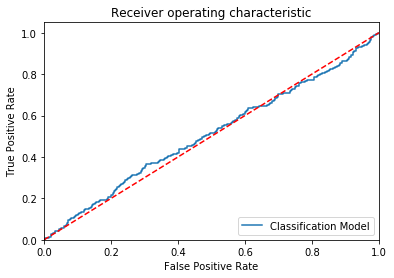

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 577   36]
 [ 289 2876]]
Outcome values : 
 577 36 289 2876
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.94      0.78       613
           0       0.99      0.91      0.95      3165

    accuracy                           0.91      3778
   macro avg       0.83      0.92      0.86      3778
weighted avg       0.94      0.91      0.92      3778

Accuracy : 91.4 %
Precision : 66.6 %
Recall : 94.1 %
F1 Score : 0.78
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 92.5 %
MCC : 0.746
roc_auc_score: 0.925


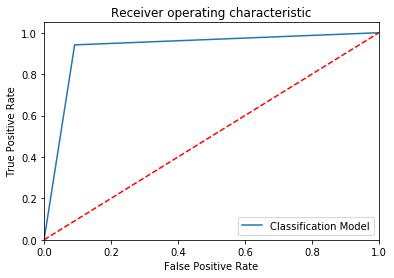

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 569   44]
 [   0 3165]]
Outcome values : 
 569 44 0 3165
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96       613
           0       0.99      1.00      0.99      3165

    accuracy                           0.99      3778
   macro avg       0.99      0.96      0.98      3778
weighted avg       0.99      0.99      0.99      3778

Accuracy : 98.8 %
Precision : 100.0 %
Recall : 92.8 %
F1 Score : 0.963
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.4 %
MCC : 0.957
roc_auc_score: 0.964


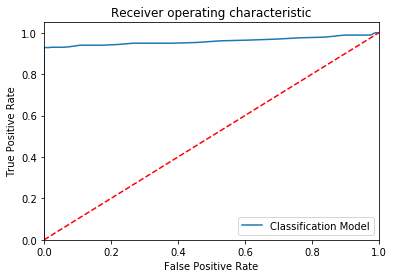

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 569   44]
 [   1 3164]]
Outcome values : 
 569 44 1 3164
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96       613
           0       0.99      1.00      0.99      3165

    accuracy                           0.99      3778
   macro avg       0.99      0.96      0.98      3778
weighted avg       0.99      0.99      0.99      3778

Accuracy : 98.8 %
Precision : 99.8 %
Recall : 92.8 %
F1 Score : 0.962
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.4 %
MCC : 0.956
roc_auc_score: 0.964


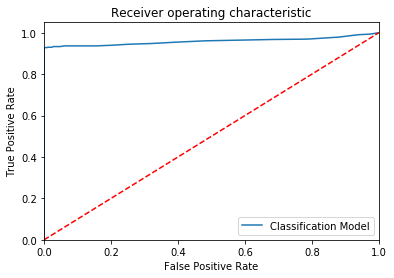

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 317  296]
 [ 357 2808]]
Outcome values : 
 317 296 357 2808
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.52      0.49       613
           0       0.90      0.89      0.90      3165

    accuracy                           0.83      3778
   macro avg       0.69      0.70      0.69      3778
weighted avg       0.83      0.83      0.83      3778

Accuracy : 82.7 %
Precision : 47.0 %
Recall : 51.7 %
F1 Score : 0.493
Specificity or True Negative Rate : 88.7 %
Balanced Accuracy : 70.2 %
MCC : 0.389
roc_auc_score: 0.702


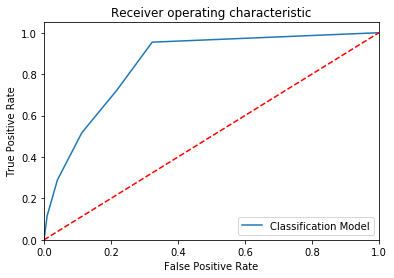

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[   0  613]
 [   0 3165]]
Outcome values : 
 0 613 0 3165
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       613
           0       0.84      1.00      0.91      3165

    accuracy                           0.84      3778
   macro avg       0.42      0.50      0.46      3778
weighted avg       0.70      0.84      0.76      3778

Accuracy : 83.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


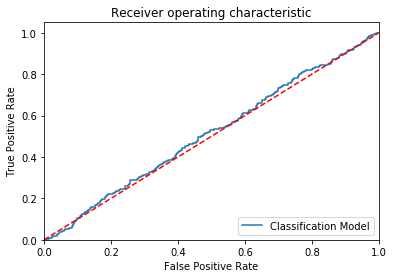

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0  613]
 [   0 3165]]
Outcome values : 
 0 613 0 3165
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       613
           0       0.84      1.00      0.91      3165

    accuracy                           0.84      3778
   macro avg       0.42      0.50      0.46      3778
weighted avg       0.70      0.84      0.76      3778

Accuracy : 83.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


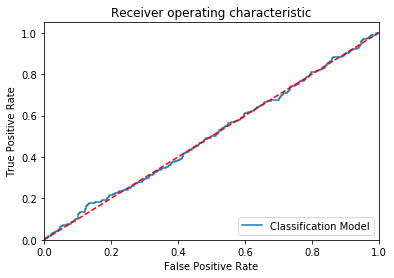

-----------------------------------------------------------------------------------------------------


In [40]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
for models in MM:
   
    # Fit the model
   
    models.fit(x_train, y_train)
   
    # Prediction
   
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
   
    # Print the model name
   
    print('Model Name: ', models)
   
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [41]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,613,0,3165,0.838,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),577,36,289,2876,0.914,0.666,0.941,0.780,0.909,0.746,0.924981,0.925
2,"(DecisionTreeClassifier(max_features='auto', r...",569,44,0,3165,0.988,1.000,0.928,0.963,1.000,0.957,0.964111,0.964
3,"(ExtraTreeClassifier(random_state=1650223720),...",569,44,1,3164,0.988,0.998,0.928,0.962,1.000,0.956,0.963953,0.964
4,KNeighborsClassifier(),317,296,357,2808,0.827,0.470,0.517,0.493,0.887,0.389,0.702166,0.702
5,GaussianNB(),0,613,0,3165,0.838,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
6,SVC(probability=True),0,613,0,3165,0.838,NaN,0.000,0.000,1.000,NaN,0.500000,0.500


Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 569   44]
 [   0 3165]]
Outcome values : 
 569 44 0 3165
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.93      0.96       613
           0       0.99      1.00      0.99      3165

    accuracy                           0.99      3778
   macro avg       0.99      0.96      0.98      3778
weighted avg       0.99      0.99      0.99      3778

Accuracy : 98.8 %
Precision : 100.0 %
Recall : 92.8 %
F1 Score : 0.963
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.4 %
MCC : 0.957
roc_auc_score: 0.964


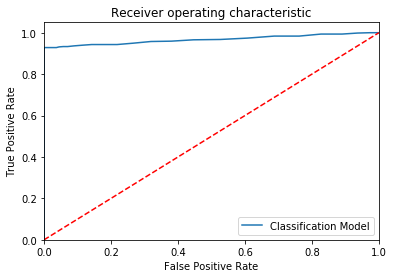

-----------------------------------------------------------------------------------------------------


In [42]:
from sklearn.ensemble import RandomForestClassifier
ModelEX = RandomForestClassifier(class_weight=class_weights, random_state=1)
MM = [ModelRF]
for models in MM:
   
    # Fit the model
   
    models.fit(x_train, y_train)
   
    # Prediction
   
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
   
    # Print the model name
   
    print('Model Name: ', models)
   
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    #---

In [43]:
#merged the actual and predicted dataset into a dataframe 
f=insu_data.merge(pd.DataFrame({'prob':y_pred}),left_index=True,right_index=True)

In [44]:
y_pred_df = pd.DataFrame({'Predicted': y_pred})
y_test_df = pd.DataFrame({'Actual': y_test})
f_n = pd.concat([insu_data, y_pred_df, y_test_df], axis=1)


In [45]:
f_n 

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,STATE,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,Predicted,Actual
0,0.0,157.13,9000.0,3.0,54.0,89.0,1.0,3.0,1.0,1.0,4.0,0.0,0.0,3.0,0.0,1.0,9.0,0.0,0.0
1,4.0,141.71,26000.0,5.0,61.0,80.0,1.0,4.0,1.0,2.0,4.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.0,157.24,13000.0,4.0,47.0,68.0,1.0,6.0,1.0,2.0,2.0,0.0,2.0,3.0,0.0,1.0,5.0,0.0,0.0
3,0.0,172.87,16000.0,9.0,36.0,16.0,1.0,7.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0
4,5.0,88.53,3000.0,4.0,51.0,16.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,3.0,0.0,1.0,14.0,0.0,0.0
5,1.0,87.02,63000.0,3.0,42.0,38.0,1.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,3.0,83.77,8000.0,9.0,35.0,97.0,1.0,3.0,1.0,2.0,6.0,0.0,2.0,3.0,0.0,1.0,8.0,0.0,0.0
8,3.0,82.14,5000.0,10.0,27.0,118.0,1.0,4.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0
9,5.0,71.29,4000.0,1.0,61.0,119.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0


In [46]:
import joblib
joblib.dump(models,'Randomforest.joblib')

['Randomforest.joblib']

In [47]:
insu_data.columns

Index(['INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'STATE', 'AGE',
       'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS',
       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'CUSTOMER_EDUCATION_LEVEL',
       'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED',
       'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE'],
      dtype='object')

In [ ]:
#EXISTING ML MODEL IS DUMPED HERE


## import joblib  
model = joblib.load('Randomforest.joblib')  # Replace with your actual model file name
 
# 2. Input New Values (Form-like)
print("Input new values for prediction:")
print(inst_mapping.to_string(index=False))
INSURANCE_TYPE= float(input("Enter value for INSURANCE_TYPE: "))
PREMIUM_AMOUNT=float(input("Enter value for PREMIUM_AMOUNT: "))
CLAIM_AMOUNT=float(input("Enter value for CLAIM_AMOUNT: "))
print(state_mapping.to_string(index=False))
STATE= float(input("Enter value for STATE: "))
AGE= float(input("Enter value for AGE: "))
TENURE= float(input("Enter value for TENURE: "))
print(empst_mapping.to_string(index=False))
EMPLOYMENT_STATUS= float(input("Enter value for EMPLOYMENT_STATUS: "))
NO_OF_FAMILY_MEMBERS= float(input("Enter value for NO_OF_FAMILY_MEMBERS: "))
print(riskseg_mapping.to_string(index=False))
RISK_SEGMENTATION= float(input("Enter value for RISK_SEGMENTATION: "))
print(houset_mapping.to_string(index=False))
HOUSE_TYPE= float(input("Enter value for HOUSE_TYPE: "))
print(custedu_mapping.to_string(index=False))
CUSTOMER_EDUCATION_LEVEL= float(input("Enter value for CUSTOMER_EDUCATION_LEVEL: "))
print(incidentseve_mapping.to_string(index=False))
INCIDENT_SEVERITY= float(input("Enter value for INCIDENT_SEVERITY: "))
print(authcont_mapping.to_string(index=False))
AUTHORITY_CONTACTED= float(input("Enter value for AUTHORITY_CONTACTED: "))
ANY_INJURY= float(input("Enter value for ANY_INJURY: "))
POLICE_REPORT_AVAILABLE= float(input("Enter value for POLICE_REPORT_AVAILABLE: "))
print(insidentst_mapping.to_string(index=False))
INCIDENT_STATE= float(input("Enter value for INCIDENT_STATE: "))

 
# Add more input prompts for other features as needed
 
# 3. Apply Values to the Model
new_data = [[INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, STATE, AGE,
       TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS,
       RISK_SEGMENTATION, HOUSE_TYPE, CUSTOMER_EDUCATION_LEVEL, INCIDENT_SEVERITY, AUTHORITY_CONTACTED,
       ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE]]  # Adjust as per your model's input format
predictions = model.predict(new_data)
 
# 4. Display Predicted Output
print("\nPredicted Output:")
print(predictions)
 
# 5. Repeat and Experiment (Optional)
while input("Do you want to try another prediction? (yes/no): ").lower() == 'yes':
    print(inst_mapping.to_string(index=False))
    INSURANCE_TYPE= float(input("Enter value for INSURANCE_TYPE: "))
    PREMIUM_AMOUNT=float(input("Enter value for PREMIUM_AMOUNT: "))
    CLAIM_AMOUNT=float(input("Enter value for CLAIM_AMOUNT: "))
    print(state_mapping.to_string(index=False))
    STATE= float(input("Enter value for STATE: "))
    AGE= float(input("Enter value for AGE: "))
    TENURE= float(input("Enter value for TENURE: "))
    print(empst_mapping.to_string(index=False))
    EMPLOYMENT_STATUS= float(input("Enter value for EMPLOYMENT_STATUS: "))
    NO_OF_FAMILY_MEMBERS= float(input("Enter value for NO_OF_FAMILY_MEMBERS: "))
    print(riskseg_mapping.to_string(index=False))
    RISK_SEGMENTATION= float(input("Enter value for RISK_SEGMENTATION: "))
    print(houset_mapping.to_string(index=False))
    HOUSE_TYPE= float(input("Enter value for HOUSE_TYPE: "))
    print(custedu_mapping.to_string(index=False))
    CUSTOMER_EDUCATION_LEVEL= float(input("Enter value for CUSTOMER_EDUCATION_LEVEL: "))
    print(incidentseve_mapping.to_string(index=False))
    INCIDENT_SEVERITY= float(input("Enter value for INCIDENT_SEVERITY: "))
    print(authcont_mapping.to_string(index=False))
    AUTHORITY_CONTACTED= float(input("Enter value for AUTHORITY_CONTACTED: "))
    print(insidentst_mapping.to_string(index=False))
    INCIDENT_STATE= float(input("Enter value for INCIDENT_STATE: "))
    ANY_INJURY= float(input("Enter value for ANY_INJURY: "))
    POLICE_REPORT_AVAILABLE= float(input("Enter value for POLICE_REPORT_AVAILABLE: "))
   
 
    # Repeat for other features as needed
    new_data = [[INSURANCE_TYPE, PREMIUM_AMOUNT, CLAIM_AMOUNT, STATE, AGE,
       TENURE, EMPLOYMENT_STATUS, NO_OF_FAMILY_MEMBERS,
       RISK_SEGMENTATION, HOUSE_TYPE, CUSTOMER_EDUCATION_LEVEL, INCIDENT_SEVERITY, AUTHORITY_CONTACTED,
       ANY_INJURY, POLICE_REPORT_AVAILABLE, INCIDENT_STATE]]  # Adjust as per your model's input format
 
    predictions = model.predict(new_data)
    print("\nPredicted Output:")
    print(predictions)
print("End of interactive demonstration.")   

Input new values for prediction:
Encoded Value INSURANCE_TYPE
            0         Health
            1           Life
            2         Mobile
            3          Motor
            4       Property
            5         Travel
Enter value for INSURANCE_TYPE: 3
Enter value for PREMIUM_AMOUNT: 177
Enter value for CLAIM_AMOUNT: 7000
Encoded Value STATE
            0    AK
            1    AL
            2    AR
            3    AZ
            4    CA
            5    CO
            6    CT
            7    DC
            8    FL
            9    GA
           10    KY
           11    MA
           12    MD
           13    OK
           14    TN
           15    VT
Enter value for STATE: 6
Enter value for AGE: 39
Enter value for TENURE: 40
Encoded Value EMPLOYMENT_STATUS
            0                 N
            1                 Y
Enter value for EMPLOYMENT_STATUS: 1
Enter value for NO_OF_FAMILY_MEMBERS: 7
Encoded Value RISK_SEGMENTATION
            0                 H
      

In [ ]:
### from sklearn.metrics import confusion_matrix
 
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')

print(conf_matrix)

sns.heatmap(conf_matrix, annot=True,fmt="d", cbar=False)

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()